# Entregable 2

## Aprendisaje Automatico

**Equipo:** Patrick Murayari, Bruno Weiss, Juan Jara

**Nombre del proyecto**: Aprender 2016-2024 *Entregable 1*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Carga del dataset

In [2]:
ruta_archivo_final = "../data/processed/2024_Ap_56listo.csv"

In [3]:
df = pd.read_csv(ruta_archivo_final, low_memory=False)

In [4]:
df.head()

,NSE_Quintiles_Q1,NSE_Quintiles_Q2,NSE_Quintiles_Q3,NSE_Quintiles_Q4,NSE_Quintiles_Q5,Nivel_Ed_Madre_Blanco,Nivel_Ed_Madre_Multimarca,Nivel_Ed_Madre_No_disponible,Nivel_Ed_Madre_No_fue_a_la_escuela,Nivel_Ed_Madre_Primaria_completo,...,sobreedad_2_años_de_sobreedad_19_años_al_30_de_junio,sobreedad_3_años_o_más_de_sobreedad_20_años_mas_30Jun,sobreedad_Blanco,sobreedad_Edad_teórica_para_el_año_17_años_al_30_de_junio,sobreedad_Menores_de_17_años,Nro_Encuestados,ambito,departamento,jurisdiccion,sector
0,0.154138,0.198068,0.220514,0.204475,0.222805,0.0,0.0,0.0,0.007172,0.055456,...,0.074476,0.036728,0.0,0.706235,0.007220,2002.659903,Urbano,Comuna 1,Ciudad Autónoma de Buenos Aires,Estatal
1,0.067305,0.104922,0.185161,0.259035,0.383577,0.0,0.0,0.0,0.004700,0.028622,...,0.016029,0.006134,0.0,0.871162,0.009292,1340.107178,Urbano,Comuna 1,Ciudad Autónoma de Buenos Aires,Privado
2,0.146852,0.155124,0.236100,0.255190,0.206735,0.0,0.0,0.0,0.005595,0.048496,...,0.065783,0.014148,0.0,0.713113,0.011604,1039.349967,Urbano,Comuna 10,Ciudad Autónoma de Buenos Aires,Estatal
3,0.032902,0.072525,0.156045,0.271968,0.466560,0.0,0.0,0.0,0.000989,0.017445,...,0.011218,0.008207,0.0,0.904064,0.003789,1318.346955,Urbano,Comuna 10,Ciudad Autónoma de Buenos Aires,Privado
4,0.168737,0.187101,0.197703,0.280708,0.165750,0.0,0.0,0.0,0.009093,0.056672,...,0.044247,0.038772,0.0,0.739628,0.002916,806.097723,Urbano,Comuna 11,Ciudad Autónoma de Buenos Aires,Estatal


### 🗒️ 2. Descripción del dataset
Este dataset contiene 44+ variables procedentes del aprender de octubre de 2024

**Variables Categoricas:**

- sector, jurisdiccion, departamento, ambito 


**Variables numéricas:**
- 44 preguntas (dirigidas al alumno) de la encuesta aprender 2024 (ya codificadas one-hot).
- Preguntas sobre el nivel de estudio alcanzado por los padres o adulto responsable.
- Nro_Encuestados: la cantidad de encuestados en esa tupla.

* Conjunto de índices:
- NSE (Nivel Socioeconómico) se construyó con las variables: nivel edu-
cativo de madre y padre, hacinamiento, percepción de la Asignación Universal por Hijo
por hogar, acceso a internet y acceso a TICs
- Clima escolar: 

**Variable objetivo:**
- desempeños en lengua: 'ldesemp_Satisfactorio', 'ldesemp_Por_debajo_del_nivel_básico', 'ldesemp_Básico', 'ldesemp_Avanzado'.
- desempeños en matematica: 'mdesemp_Por_debajo_del_nivel_básico', 'mdesemp_Satisfactorio', 'mdesemp_Básico', 'mdesemp_Avanzado'.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Columns: 1032 entries, NSE_Quintiles_Q1 to sector
dtypes: float64(1028), object(4)
memory usage: 9.7+ MB


In [ ]:
# Información general
df.describe()

In [6]:
def revisar_nans(df):
    """
    Verifica si un DataFrame tiene valores NaN y los imprime.
    """
    if df.isna().any().any():  # True si hay al menos un NaN
        print("El DataFrame tiene valores NaN.")
        # Opcional: mostrar cuántos NaN por columna
        print(df.isna().sum())
    else:
        print("El DataFrame no tiene valores NaN.")
revisar_nans(df)

El DataFrame tiene valores NaN.
NSE_Quintiles_Q1    1
NSE_Quintiles_Q2    1
NSE_Quintiles_Q3    1
NSE_Quintiles_Q4    1
NSE_Quintiles_Q5    1
                   ..
Nro_Encuestados     0
ambito              0
departamento        0
jurisdiccion        0
sector              0
Length: 1032, dtype: int64


In [7]:
def mostrar_filas_nan(df):
    """
    Imprime las filas que contienen al menos un valor NaN en el DataFrame.
    """
    filas_nan = df[df.isna().any(axis=1)]
    if not filas_nan.empty:
        print("Filas con NaN:")
        print(filas_nan)
    else:
        print("No hay filas con NaN.")
mostrar_filas_nan(df)

Filas con NaN:
     NSE_Quintiles_Q1  NSE_Quintiles_Q2  NSE_Quintiles_Q3  NSE_Quintiles_Q4  \
555               NaN               NaN               NaN               NaN   

     NSE_Quintiles_Q5  Nivel_Ed_Madre_Blanco  Nivel_Ed_Madre_Multimarca  \
555               NaN                    NaN                        NaN   

     Nivel_Ed_Madre_No_disponible  Nivel_Ed_Madre_No_fue_a_la_escuela  \
555                           NaN                                 NaN   

     Nivel_Ed_Madre_Primaria_completo  ...  \
555                               NaN  ...   

     sobreedad_2_años_de_sobreedad_19_años_al_30_de_junio  \
555                                                NaN      

     sobreedad_3_años_o_más_de_sobreedad_20_años_mas_30Jun  sobreedad_Blanco  \
555                                                NaN                   NaN   

     sobreedad_Edad_teórica_para_el_año_17_años_al_30_de_junio  \
555                                                NaN           

     sobreedad_Men

In [9]:
# eliminar filas que tengan al menos un NaN
df = df.dropna()

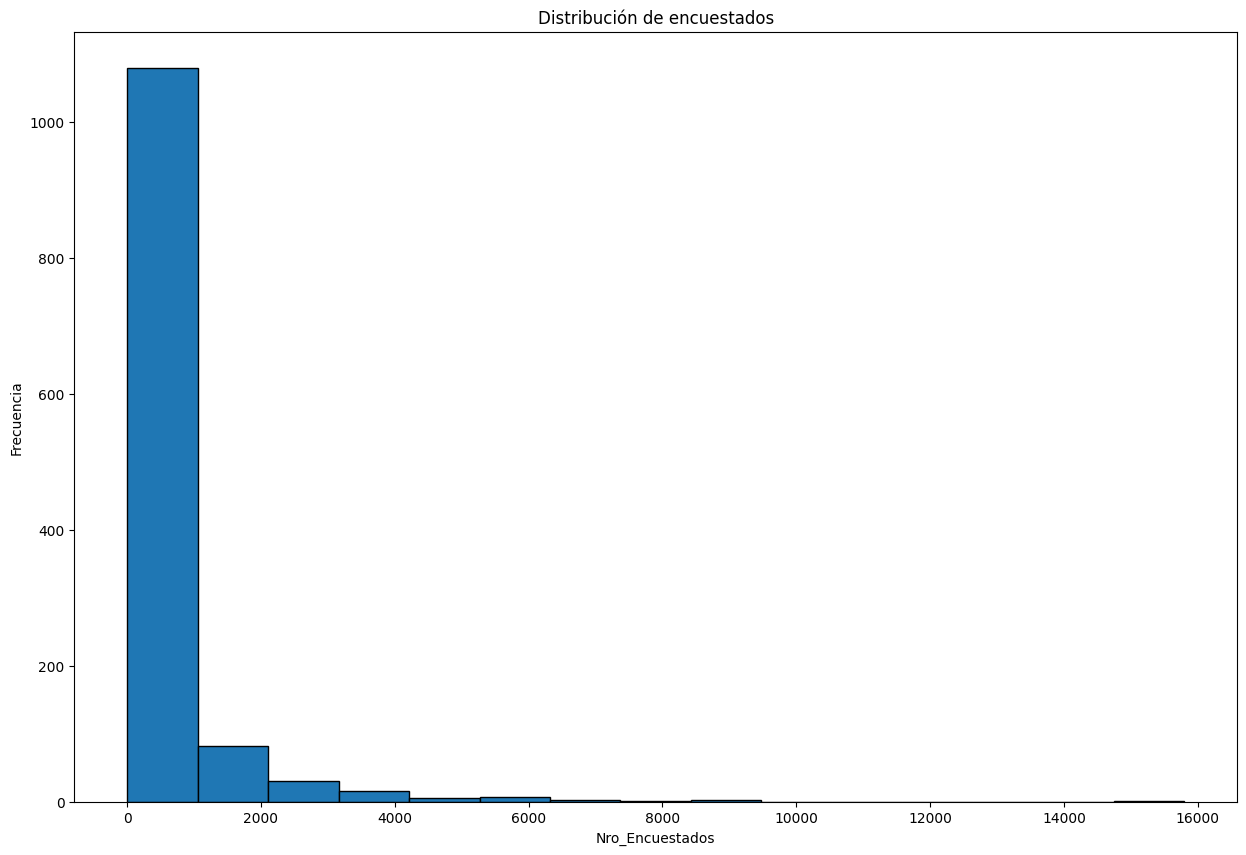

In [10]:
plt.figure(figsize=(15,10))
plt.hist(df['Nro_Encuestados'], bins=15, edgecolor='black')
plt.title('Distribución de encuestados')
plt.xlabel('Nro_Encuestados')
plt.ylabel('Frecuencia')
plt.show()

#### 🧊 Detección de outliers con boxplots

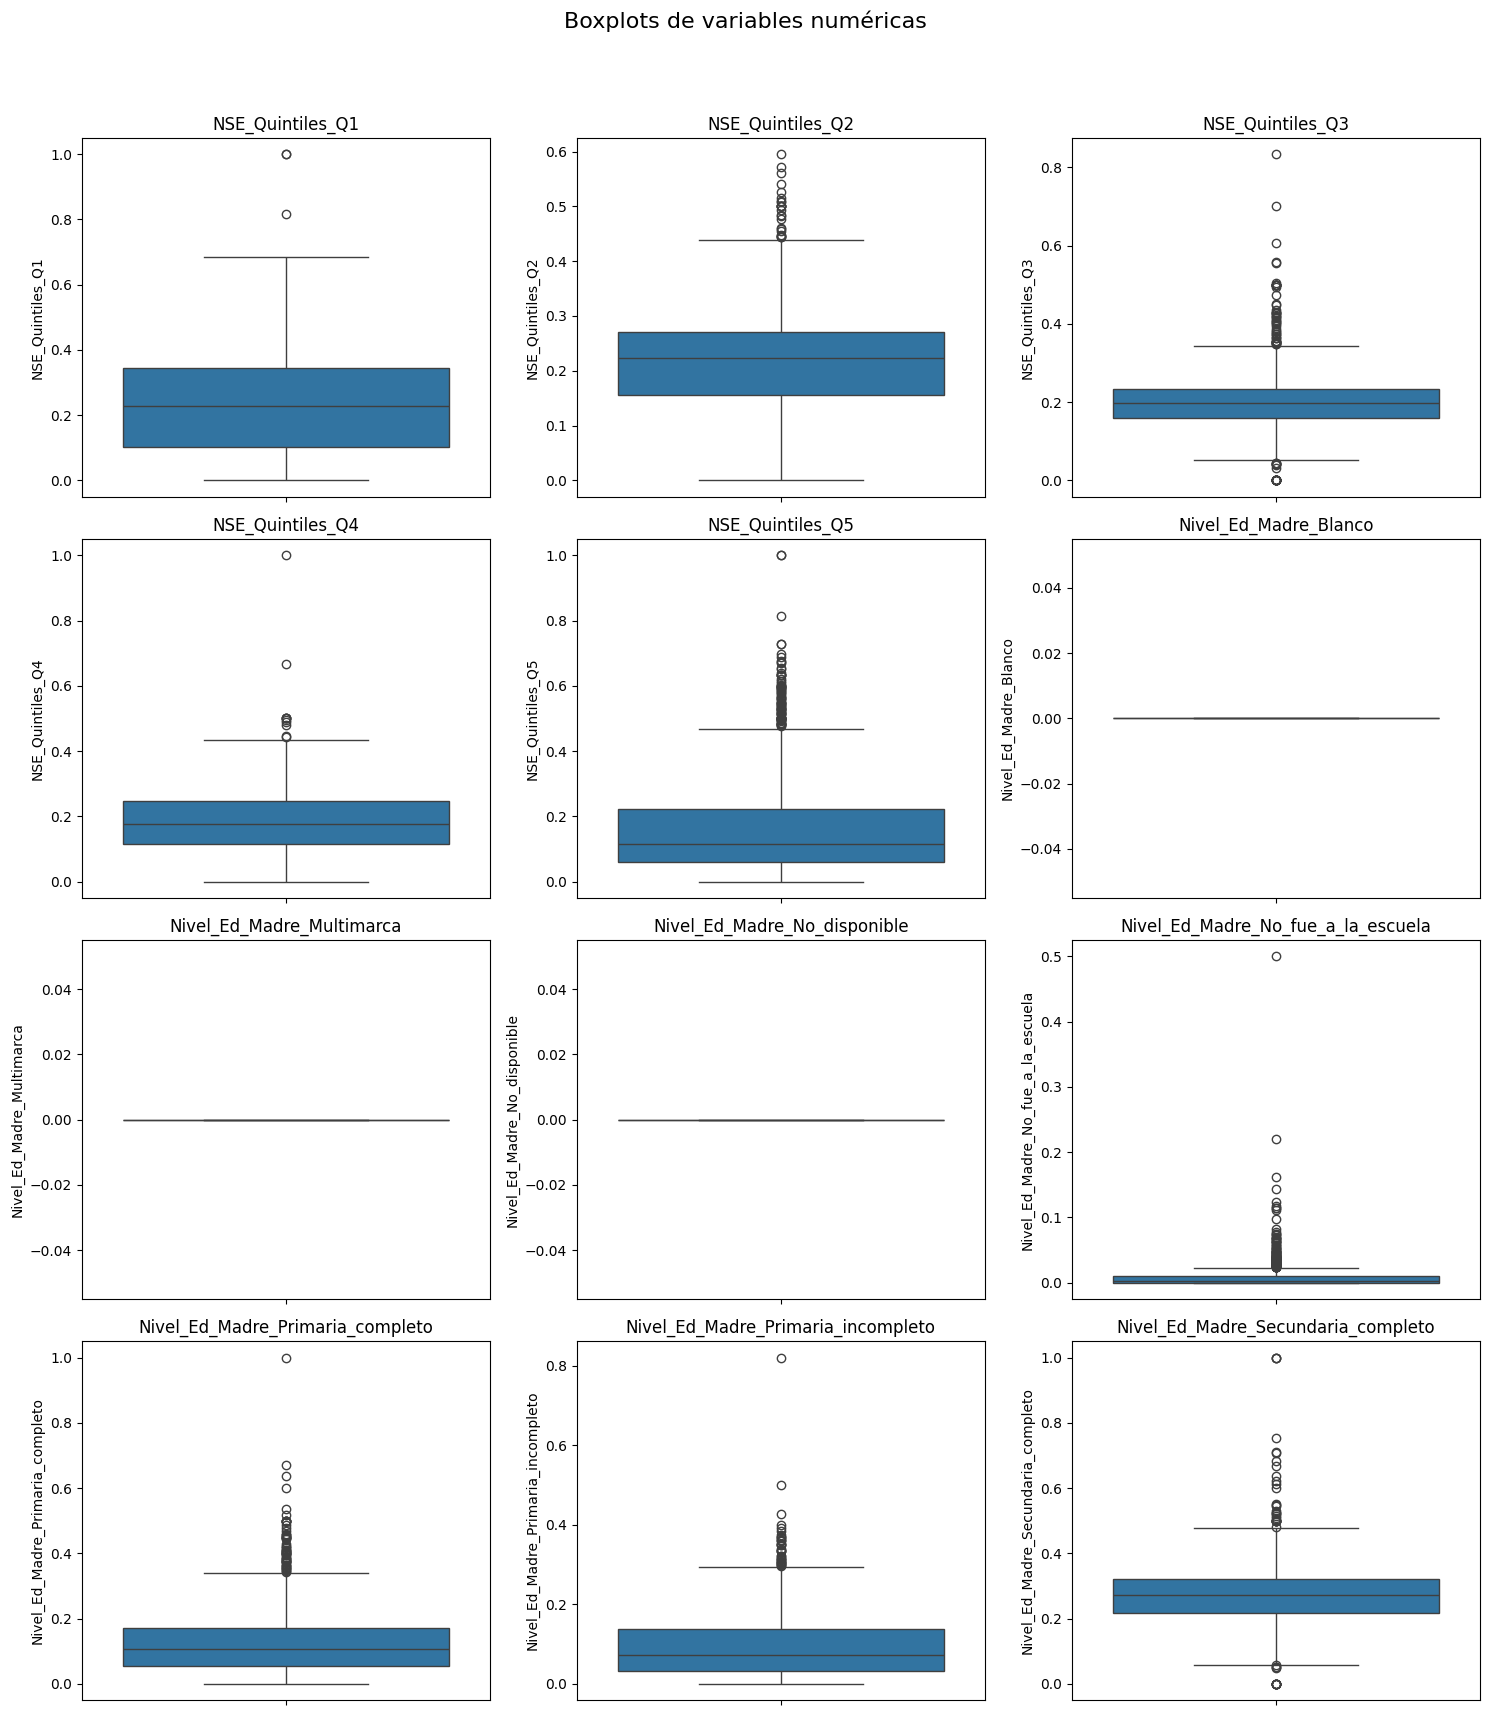

In [11]:
# Boxplots verticales de las 12 variables numéricas (3 por fila)
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

columnas = df.select_dtypes(include='number').columns

for i, ax in enumerate(axes.flat):
    sns.boxplot(y=df[columnas[i]], ax=ax)
    ax.set_title(columnas[i])

plt.suptitle('Boxplots de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 🔗 Matriz de correlación entre variables numéricas

#### Atencion solo para COLAB, revienta maquinas

In [1]:
#plt.figure(figsize=(12, 8))
#sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
#plt.title("Matriz de correlación")
#plt.show()

#### 📊 Relación entre variables: ejemplo alcohol vs quality

aca metemos alguna con relacion a lmatematica

### 🧼 4. Diagnóstico de calidad de datos
- Solo hay un dato faltante para los datos de 2024.
- Algunas variables muestran asimetrías (ej: `residual sugar`, `chlorides`).
- Existen valores atípicos en varias variables.
- Se observa una posible relación positiva entre .

### 🧪 5. Transformaciones realizadas

- Los datos ya traen codificacion one-hot
- se creo la columna 'Nro_Encuestados'  que es la suma de la pregunta que todos respondieron
el mes en el que nacieron.
- a partir de la variable anterior, se paso todo el dataset a frecuencias, teniendo valores entre 0 y 1


### ✍️ 6. Reflexión final

- Este análisis exploratorio inicial permite entender la estructura y calidad del dataset. Las visualizaciones mostraron varias variables con outliers y diferentes distribuciones.La transformación de quality en una etiqueta categórica permitirá futuros análisis supervisados. La normalización garantiza que todas las variables numéricas estén en una misma escala.

- Se invita a los estudiantes a ser propositivos y analíticos, justificando cada transformación o decisión. Las visualizaciones no deben ser decorativas, sino argumentos visuales que ayuden a entender los datos.

In [ ]:
from pandas.api.types import is_numeric_dtype

def analizar_dataframe(df):
    for col in df.columns:
        print(f"\nColumna: {col}")
        tipo = df[col].dtype

        if is_numeric_dtype(tipo):
            print("Tipo: float")
            print(f"  Media: {df[col].mean()}")
            print(f"  Moda: {df[col].mode().iloc[0] if not df[col].mode().empty else 'Sin moda'}")
            print(f"  Mínimo: {df[col].min()}")
            print(f"  Máximo: {df[col].max()}")

        elif pd.api.types.is_object_dtype(tipo):
            print("Tipo: objeto")
            num_categorias = df[col].nunique()
            if num_categorias > 20:
                print(f"  Más de 20 categorías ({num_categorias}), no se listan.")
            else:
                print(f"  Categorías más frecuentes:")
                print(f"  {df[col].value_counts().head(5)}")
        else:
            print(f"Tipo no explorado: {tipo}")
        print("\n")

In [ ]:
#analizar_dataframe(data)